In [14]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [3]:
train = pd.read_csv('./data/VUA/VUA_train_features2.csv')
train.head(10)

,id,sentence,word,label,pos,tag,local
0,a1e-fragment01_1_1,Latest corporate unbundler reveals laid-back a...,Latest,0,ADJ,JJS,Latest corporate unbundler reveals laid-back a...
1,a1e-fragment01_1_2,Latest corporate unbundler reveals laid-back a...,corporate,0,ADJ,JJ,Latest corporate unbundler reveals laid-back a...
2,a1e-fragment01_1_3,Latest corporate unbundler reveals laid-back a...,unbundler,0,PROPN,NNP,Latest corporate unbundler reveals laid-back a...
3,a1e-fragment01_1_4,Latest corporate unbundler reveals laid-back a...,reveals,1,VERB,VBZ,Latest corporate unbundler reveals laid-back a...
4,a1e-fragment01_1_5,Latest corporate unbundler reveals laid-back a...,laid-back,0,VERB,VBN,Latest corporate unbundler reveals laid-back a...
5,a1e-fragment01_1_6,Latest corporate unbundler reveals laid-back a...,approach,1,NOUN,NN,Latest corporate unbundler reveals laid-back a...
6,a1e-fragment01_1_8,Latest corporate unbundler reveals laid-back a...,Roland,0,PROPN,NNP,Latest corporate unbundler reveals laid-back a...
7,a1e-fragment01_1_9,Latest corporate unbundler reveals laid-back a...,Franklin,0,PROPN,NNP,Latest corporate unbundler reveals laid-back a...
8,a1e-fragment01_1_11,Latest corporate unbundler reveals laid-back a...,who,0,PRON,WP,who is leading a 697m pound break-up bid for ...
9,a1e-fragment01_1_12,Latest corporate unbundler reveals laid-back a...,is,0,AUX,VBZ,who is leading a 697m pound break-up bid for ...


In [4]:
test_verb = pd.read_csv('./data/VUA/VUA_verb_features.csv')
test_verb.head(10)

,id,sentence,word,label,pos,tag,local
0,a3m-fragment02_45_3,Design : Crossed lines over the toytown tram :...,Crossed,1,VERB,VBN,Design : Crossed lines over the toytown tram :...
1,a3m-fragment02_45_21,Design : Crossed lines over the toytown tram :...,says,0,VERB,VBZ,says Jonathan Glancey
2,a3m-fragment02_47_8,"MODERN trams , as most continental Europeans k...",know,0,VERB,VB,as most continental Europeans know
3,a3m-fragment02_47_11,"MODERN trams , as most continental Europeans k...",shake,0,VERB,VB,neither shake nor rattle
4,a3m-fragment02_47_13,"MODERN trams , as most continental Europeans k...",rattle,0,VERB,VB,neither shake nor rattle
5,a3m-fragment02_47_18,"MODERN trams , as most continental Europeans k...",roll,0,NOUN,NN,nor do they roll .
6,a3m-fragment02_48_4,"Sleek , solidly built , gentle on the environm...",built,0,VERB,VBN,solidly built
7,a3m-fragment02_49_3,They also exert a fascination very much of the...,exert,1,VERB,VB,They also exert a fascination very much of the...
8,a3m-fragment02_49_13,They also exert a fascination very much of the...,slither,1,VERB,VB,They also exert a fascination very much of the...
9,a3m-fragment02_49_23,They also exert a fascination very much of the...,flashing,0,VERB,VBG,flashing arcs of lightning as they switch tra...


In [5]:
test_allpos = pd.read_csv('./data/VUA/VUA_allpos_features.csv')
test_allpos.head(10)

,id,sentence,word,label,pos,tag,local
0,a3m-fragment02_45_1,Design : Crossed lines over the toytown tram :...,Design,0,NOUN,NN,Design : Crossed lines over the toytown tram :...
1,a3m-fragment02_45_3,Design : Crossed lines over the toytown tram :...,Crossed,1,VERB,VBN,Design : Crossed lines over the toytown tram :...
2,a3m-fragment02_45_4,Design : Crossed lines over the toytown tram :...,lines,1,NOUN,NNS,Design : Crossed lines over the toytown tram :...
3,a3m-fragment02_45_7,Design : Crossed lines over the toytown tram :...,toytown,0,PROPN,NNP,Design : Crossed lines over the toytown tram :...
4,a3m-fragment02_45_8,Design : Crossed lines over the toytown tram :...,tram,0,PROPN,NNP,Design : Crossed lines over the toytown tram :...
5,a3m-fragment02_45_10,Design : Crossed lines over the toytown tram :...,City,0,NOUN,NN,Design : Crossed lines over the toytown tram :...
6,a3m-fragment02_45_11,Design : Crossed lines over the toytown tram :...,transport,0,NOUN,NN,Design : Crossed lines over the toytown tram :...
7,a3m-fragment02_45_13,Design : Crossed lines over the toytown tram :...,soon,0,ADV,RB,Design : Crossed lines over the toytown tram :...
8,a3m-fragment02_45_15,Design : Crossed lines over the toytown tram :...,back,1,ADV,RB,Design : Crossed lines over the toytown tram :...
9,a3m-fragment02_45_18,Design : Crossed lines over the toytown tram :...,right,0,INTJ,UH,Design : Crossed lines over the toytown tram :...


In [6]:
train2 = pd.read_csv('./data/TOEFI/TOEFI_train_features2.csv')
train2.head(10)

,id,sentence,word,label,pos,tag,local
0,1726678_1_1,I really do not agree that young people enjoy ...,I,0,PRON,PRP,I really do not agree that young people enjoy ...
1,1726678_1_2,I really do not agree that young people enjoy ...,really,0,ADV,RB,I really do not agree that young people enjoy ...
2,1726678_1_3,I really do not agree that young people enjoy ...,do,0,AUX,VB,I really do not agree that young people enjoy ...
3,1726678_1_4,I really do not agree that young people enjoy ...,not,0,PART,RB,I really do not agree that young people enjoy ...
4,1726678_1_5,I really do not agree that young people enjoy ...,agree,0,VERB,VBP,I really do not agree that young people enjoy ...
5,1726678_1_6,I really do not agree that young people enjoy ...,that,0,DET,DT,I really do not agree that young people enjoy ...
6,1726678_1_7,I really do not agree that young people enjoy ...,young,0,ADJ,JJ,I really do not agree that young people enjoy ...
7,1726678_1_8,I really do not agree that young people enjoy ...,people,0,NOUN,NNS,I really do not agree that young people enjoy ...
8,1726678_1_9,I really do not agree that young people enjoy ...,enjoy,0,VERB,VB,I really do not agree that young people enjoy ...
9,1726678_1_10,I really do not agree that young people enjoy ...,life,0,NOUN,NN,I really do not agree that young people enjoy ...


In [7]:
test_verb2 = pd.read_csv('./data/TOEFI/TOEFI_verb_features.csv')
test_verb2.head(10)

,id,sentence,word,label,pos,tag,local
0,1004097_13_9,"When we travel to other countries , we care la...",care,0,NOUN,NN,we care largely about the currency rates wher...
1,626474_5_2,It gives me the opportunity to meet new people...,gives,0,VERB,VBZ,It gives me the opportunity to meet new people...
2,1761802_2_16,For that i tried from that time to identify wh...,specialized,0,ADJ,JJ,For that i tried from that time to identify wh...
3,997336_7_12,"For example , it is easy to anyone of us to ma...",make,0,VERB,VB,it is easy to anyone of us to make ideas abou...
4,296169_11_10,After a long time of building and working to a...,achieve,0,VERB,VB,After a long time of building and working to a...
5,607448_24_12,I take this as a cheating method because when ...,advertising,0,NOUN,NN,I take this as a cheating method because when ...
6,597186_8_24,The third reason I believe most advertisements...,tried,0,VERB,VBD,The third reason I believe most advertisements...
7,1744005_10_22,"In conclusion , poeople who succeed in life ar...",facing,0,VERB,VBG,nor meant to be afraid of taking risks and fa...
8,1351833_8_12,"Under this situation , he graduated from his h...",understanding,0,NOUN,NN,he graduated from his high school without und...
9,1541362_9_13,"Moreover , as I ve always liked dealing with c...",spend,0,VERB,VB,I spend some of my spare time helping kids wh...


In [8]:
test_allpos2 = pd.read_csv('./data/TOEFI/TOEFI_allpos_features.csv')
test_allpos2.head(10)

,id,sentence,word,label,pos,tag,local
0,1178027_5_40,They will be able to tell us about the history...,curious,0,ADJ,JJ,They will be able to tell us about the history...
1,1542465_12_30,That is true in sports and music at a very ear...,university,0,NOUN,NN,but it s a problem also for students at an un...
2,1942513_4_11,and sometimes facts change with the daily incr...,feilds,0,NOUN,NNS,and sometimes facts change with the daily incr...
3,98336_14_22,There s no need to stay up until the break of ...,simple,0,ADJ,JJ,but just to live life and appreciate its simp...
4,296169_7_9,It s well known that when you are young you do...,young,0,ADJ,JJ,It s well known that when you are young you do...
5,607448_24_12,I take this as a cheating method because when ...,advertising,0,NOUN,NN,I take this as a cheating method because when ...
6,450861_3_12,The most important reason is the unstoppable e...,underdeveloped,0,ADJ,JJ,The most important reason is the unstoppable e...
7,543170_10_3,"However , beause of the well established netwo...",beause,0,VERB,VB,beause of the well established network
8,1542465_9_19,"Anyway , in my opion , someone really knows th...",knowledge,0,NOUN,NN,someone really knows the area of interest whe...
9,391270_12_27,"On the contrary , if you are not lucky , you c...",even,0,ADV,RB,that is even worst the company of a group of ...


In [11]:
train.shape, test_verb.shape, test_allpos.shape

((160154, 7), (5873, 7), (22196, 7))

In [12]:
train2.shape, test_verb2.shape, test_allpos2.shape

((58497, 7), (2301, 7), (9014, 7))

In [ ]:
train[train['pos']=='VERB']

In [ ]:
train['label'].value_counts().plot.bar()
plt.title('Label')

In [ ]:
test_verb['label'].value_counts().plot.bar()
plt.title('Label')

In [ ]:
test_allpos['label'].value_counts().plot.bar()
plt.title('Label')

In [29]:
print(test_verb['label'].value_counts())
print(test_allpos['label'].value_counts())
print(train2['label'].value_counts())
print(test_verb2['label'].value_counts())
print(test_allpos2['label'].value_counts())
print(train['label'].value_counts())
print(test_verb['label'].value_counts())
print(test_allpos['label'].value_counts())
print(train2['label'].value_counts())
print(test_verb2['label'].value_counts())
print(test_allpos2['label'].value_counts())

0    140983
1     19171
Name: label, dtype: int64
0    4112
1    1761
Name: label, dtype: int64
0    18214
1     3982
Name: label, dtype: int64
0    56357
1     2140
Name: label, dtype: int64
0    2301
Name: label, dtype: int64
0    9014
Name: label, dtype: int64


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
train['label'].hist()
test_allpos['label'].hist()
test_verb['label'].hist()
ax.legend(['training', 'all pos task', 'verb task'])
plt.xticks(np.arange(0, 2, 1))
plt.xlabel('label')
plt.ylabel('number')
plt.show()

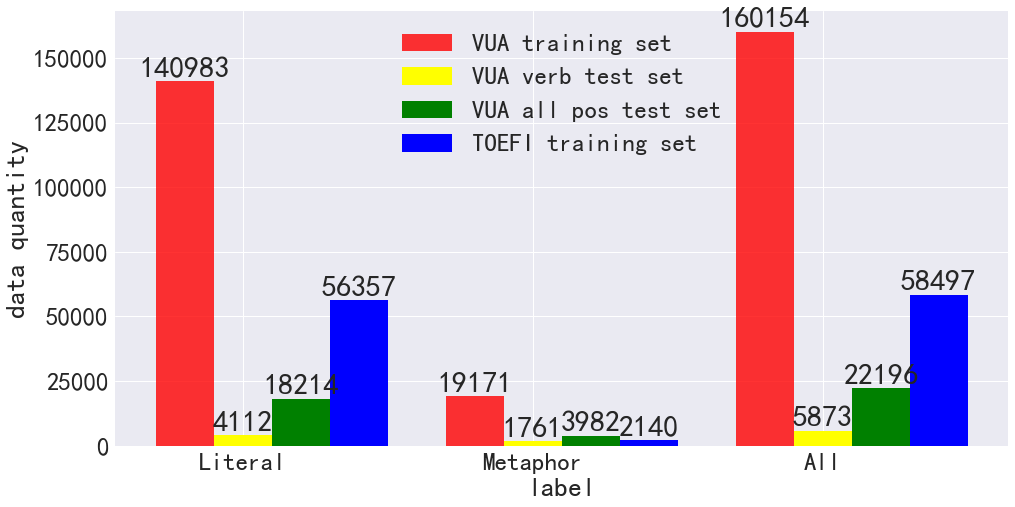

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

label_list = ['Literal', 'Metaphor', 'All']
num_list1 = [140983, 19171, 160154]
num_list2 = [4112, 1761, 5873]
num_list3 = [18214, 3982, 22196]
num_list4 = [56357, 2140, 58497]
x = range(len(num_list1))
"""
绘制条形图
left:长条形中点横坐标
height:长条形高度
width:长条形宽度，默认值0.8
label:为后面设置legend准备
"""
rects1 = plt.bar(x, height=num_list1, width=0.2, alpha=0.8, color='red', label="VUA training set")
rects2 = plt.bar([i + 0.2 for i in x], height=num_list2, width=0.2, color='yellow', label="VUA verb test set")
rects3 = plt.bar([i + 0.4 for i in x], height=num_list3, width=0.2, color='green', label="VUA all pos test set")
rects4 = plt.bar([i + 0.6  for i in x], height=num_list4, width=0.2, color='blue', label="TOEFI training set")
# plt.ylim(0, 50)     # y轴取值范围
plt.ylabel("data quantity")
"""
设置x轴刻度显示值
参数一：中点坐标
参数二：显示值
"""
plt.xticks([index + 0.2 for index in x], label_list)
plt.xlabel("label")
plt.legend()     # 设置题注
# 编辑文本
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rects3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rects4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.show()

In [32]:
train['len'] = train['sentence'].str.count(' ')+1
test_verb['len'] = test_verb['sentence'].str.count(' ')+1
test_allpos['len'] = test_allpos['sentence'].str.count(' ')+1

In [33]:
train2['len'] = train2['sentence'].str.count(' ')+1
test_verb2['len'] = test_verb2['sentence'].str.count(' ')+1
test_allpos2['len'] = test_allpos2['sentence'].str.count(' ')+1

In [34]:
train['len'].head(10)

0    25
1    25
2    25
3    25
4    25
5    25
6    25
7    25
8    25
9    25
Name: len, dtype: int64

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.kdeplot(train.loc[train['label'] == '1', 'len'], ax=ax[0], label='Metaphor')
sns.kdeplot(train.loc[train['label'] == '0', 'len'], ax=ax[0], label='Literal')
train.loc[train['label'] == '1', 'len'].hist(ax=ax[1])
train.loc[train['label'] == '0', 'len'].hist(ax=ax[1])
ax[1].legend(['Metaphor', 'Literal'])
plt.show()

D:\Python\Anaconda3.6\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

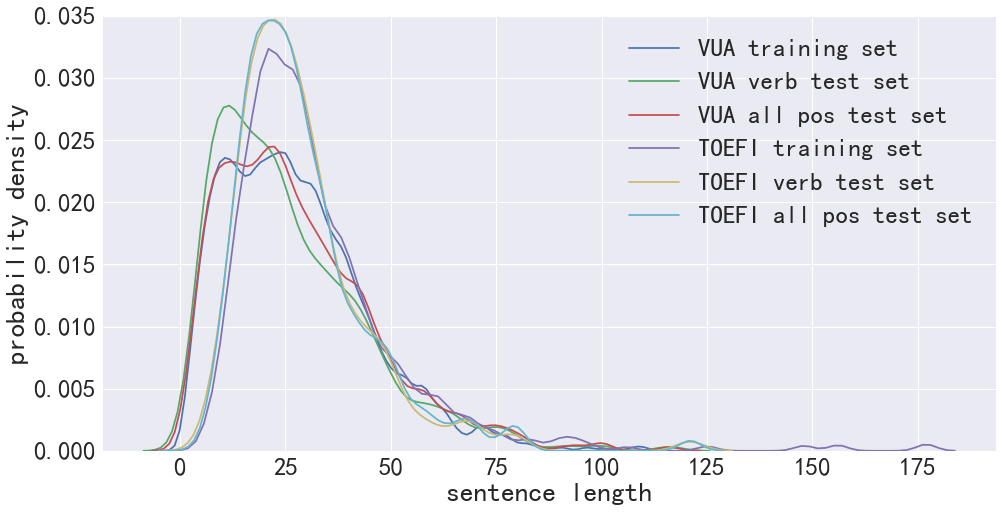

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.kdeplot(train['len'], label='VUA training set')
sns.kdeplot(test_verb['len'], label='VUA verb test set')
sns.kdeplot(test_allpos['len'], label='VUA all pos test set')
sns.kdeplot(train2['len'], label='TOEFI training set')
sns.kdeplot(test_verb2['len'], label='TOEFI verb test set')
sns.kdeplot(test_allpos2['len'], label='TOEFI all pos test set')
plt.xlabel('sentence length')
plt.ylabel('probability density')
plt.xticks(np.arange(0, 200, 25))
plt.yticks(np.arange(0, 0.04, 0.005))
plt.show()


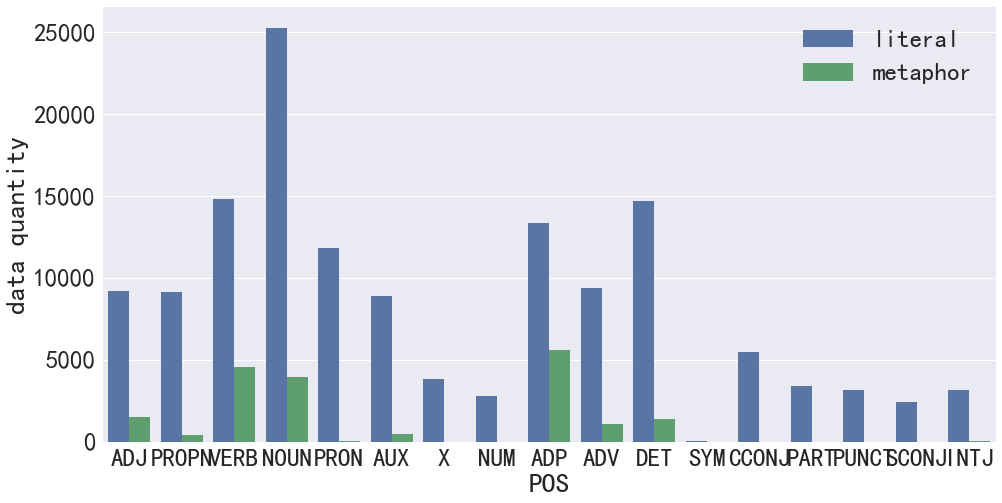

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.countplot(x='pos', hue='label',data=train)
plt.xlabel('POS')
plt.ylabel('data quantity')
ax.legend(['literal', 'metaphor'])
plt.show()

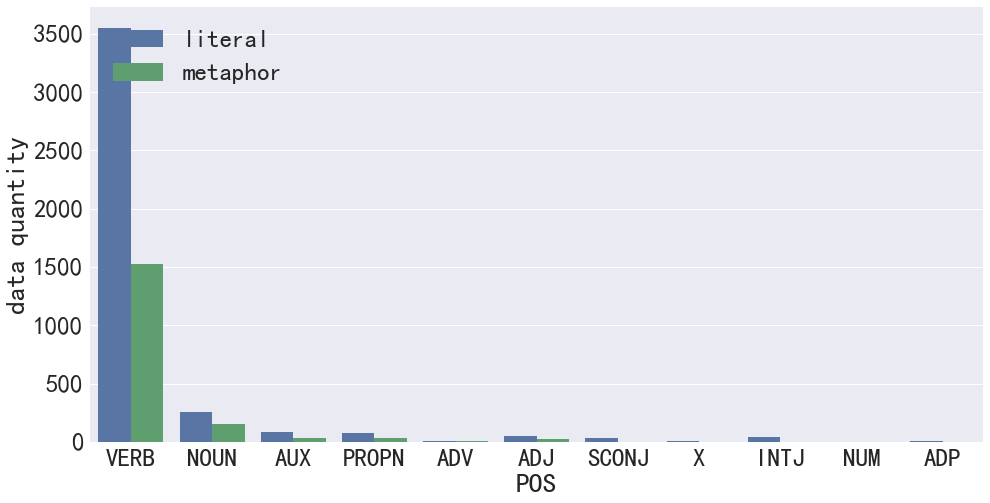

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.countplot(x='pos', hue='label',data=test_verb)
plt.xlabel('POS')
plt.ylabel('data quantity')
ax.legend(['literal', 'metaphor'])
plt.show()

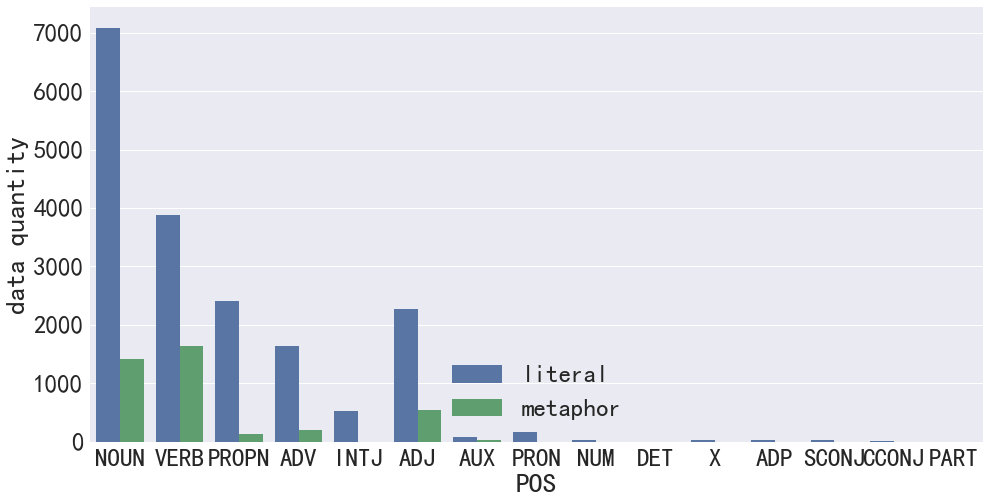

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.countplot(x='pos', hue='label',data=test_allpos)
plt.xlabel('POS')
plt.ylabel('data quantity')
ax.legend(['literal', 'metaphor'])
plt.show()

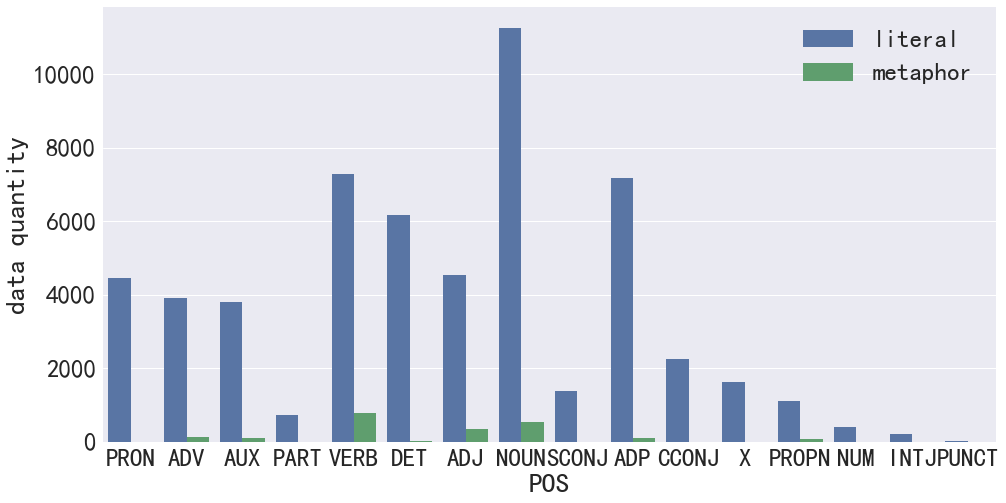

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.countplot(x='pos', hue='label',data=train2)
plt.xlabel('POS')
plt.ylabel('data quantity')
ax.legend(['literal', 'metaphor'])
plt.show()